# Loading 2D Gaussian Distribution

Tensor of 2 distributions from 2 qubit registers. Generalization to higher dimensions follows.

See documentation https://docs.pennylane.ai/en/stable/

Notebook by: Óscar Amaro (2023)

In [1]:
import matplotlib.pyplot as plt

import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
from numpy import pi
from numpy import sqrt, log, exp

from tqdm import trange
from scipy.special import kl_div

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pennylane==0.32.0


### Extract probability distributions from each isolated quantum register

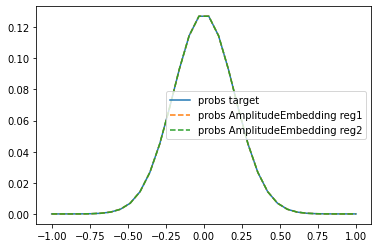

In [59]:
# main parameters
nqubits = 5
mu=0; sigma=0.2;

xmin = -1; xmax = 1;
xlst = np.linspace(xmin,xmax,2**nqubits)
probs_target = exp(-0.5*(xlst-mu)**2/sigma**2) # prob = |psi|^2
amps = sqrt(probs_target) # psi

# embedding amplitude directly with qml
dev = qml.device('default.qubit', wires=2*nqubits)
@qml.qnode(dev)
def circuit(f=None):
    f2 = np.outer(amps,amps).flatten() # outer product of the two distributions
    qml.AmplitudeEmbedding(features=f2, wires=range(2*nqubits), normalize=True)
    return qml.probs(wires=[i for i in range(nqubits)]), qml.probs(wires=[i for i in range(nqubits,2*nqubits)]), qml.probs(wires=[i for i in range(2*nqubits)])
probs_qml = circuit(f=amps/sqrt(np.sum( amps**2 )));

plt.plot(xlst, probs_target/np.sum(probs_target), label=r'probs target' )
plt.plot(xlst, probs_qml[0], '--', label=r'probs AmplitudeEmbedding reg1')
plt.plot(xlst, probs_qml[1], '--', label=r'probs AmplitudeEmbedding reg2')
plt.legend()
plt.show()

### Complete Probability distribution

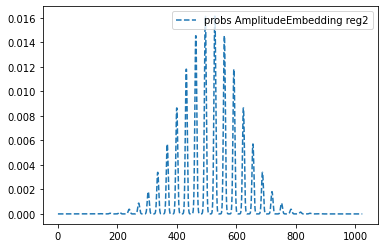

In [60]:
plt.plot(probs_qml[2], '--', label=r'probs AmplitudeEmbedding reg2')
plt.legend()
plt.show()

### Reshape vector to show 2D form of Gaussian distribution

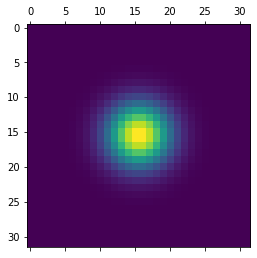

In [61]:
plt.matshow(probs_qml[2].reshape((2**nqubits,2**nqubits)))
plt.show()